# Evaluation of Jaccard score

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

## Loading data

In [2]:
# Define the path to the CSV file containing Jaccard scores
path = Path('../../results/evaluation/Jaccard_score.csv')

# Try to read the CSV file into a DataFrame
try:
    data = pd.read_csv(path)  # Read the CSV file
except:
    # If reading the file fails (e.g., file not found), print an error message
    print('No results to analyze.')


In [3]:
# Showing data
data


,Image Name,KMeans,MiniBatchKMeans,BisectingKMeans,Birch,GaussianMixture,Clusterer
0,12a.jpg,0.931569,0.925057,0.866394,0.912475,0.913492,0.916149
1,12b.jpg,0.913992,0.913760,0.899200,0.906678,0.904579,0.914282
2,12c.jpg,0.907294,0.907246,0.904665,0.877766,0.887136,0.907246
3,12d.jpg,0.905713,0.908069,0.907775,0.899540,0.893810,0.914475
4,12e.jpg,0.916694,0.696940,0.636804,0.906669,0.915642,0.906820


## Description
The dataset presents the Jaccard scores for different clustering algorithms across several images. These clustering algorithms include:

1) **KMeans**: A widely-used algorithm that clusters data by partitioning it into a predefined number of clusters (K), aiming to minimize within-cluster variance.
2) **MiniBatchKMeans**: A faster variant of KMeans that uses mini-batches to update the centroids, making it more efficient for large datasets.
3) **BisectingKMeans**: A hierarchical clustering method that splits clusters iteratively by applying KMeans, generally producing better results for certain data distributions.
4) **Birch**: A clustering method designed to handle large datasets efficiently by using a tree structure, grouping data based on proximity.
5) **GaussianMixture**: A probabilistic model that assumes data points are generated from a mixture of several Gaussian distributions, useful for handling more complex data structures.

Finally, the **Clusterer** column represents the aggregation of all the previous algorithms using a majority voting mechanism. This means that for each image, the algorithm (**Clusterer**) takes the most common clustering result across all the other methods. It serves as an ensemble approach, combining the strengths of each algorithm to improve the overall clustering performance, particularly in cases where individual algorithms might yield conflicting results. In the case of image "12e.jpg", for example, the **Clusterer** score is slightly lower than some individual algorithms, suggesting that the majority voting doesn't always result in a better outcome than the best-performing algorithm.

The values for the **Clusterer** are consistently in the same range or slightly better than most individual algorithms, highlighting its potential to provide more stable and reliable clustering results through the majority voting mechanism.

See the visualization below for a clear comparison of the clustering performance across the algorithms, including the aggregated Clusterer results.

In [4]:
# It calculates summary statistics like count, mean, std, min, 25%, 50%, 75%, and max for each numerical column
describe = data.describe()

# Display the descriptive statistics for inspection
describe

,KMeans,MiniBatchKMeans,BisectingKMeans,Birch,GaussianMixture,Clusterer
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.915052,0.870214,0.842968,0.900626,0.902932,0.911794
std,0.010296,0.097124,0.116427,0.013577,0.012334,0.004409
min,0.905713,0.696940,0.636804,0.877766,0.887136,0.906820
25%,0.907294,0.907246,0.866394,0.899540,0.893810,0.907246
50%,0.913992,0.908069,0.899200,0.906669,0.904579,0.914282
75%,0.916694,0.913760,0.904665,0.906678,0.913492,0.914475
max,0.931569,0.925057,0.907775,0.912475,0.915642,0.916149


## Visualization

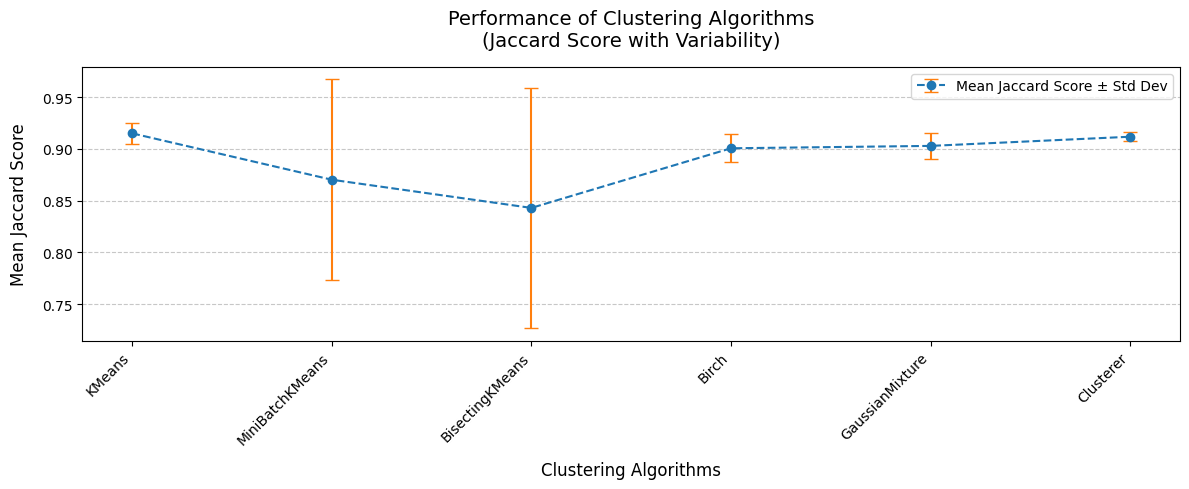

In [5]:
# Improved visualization for error bars and dashed line plot
plt.figure(figsize=(12, 5))  # Set figure size

# Plot points with a dashed line and error bars
plt.errorbar(
    range(len(describe.columns)),
    describe.loc['mean'],
    yerr=describe.loc['std'],
    fmt='o',
    linestyle='--',
    color='#1f77b4',  # A soft blue color for the line
    ecolor='#ff7f0e',  # Orange color for the error bars
    capsize=5,
    label='Mean Jaccard Score ± Std Dev'
)

# Set custom x-ticks to display column labels
plt.xticks(
    ticks=range(len(describe.columns)),
    labels=describe.columns,
    rotation=45,
    ha='right'  # Rotate and align labels to the right
)

# Add labels and title
plt.xlabel('Clustering Algorithms', fontsize=12, labelpad=10)
plt.ylabel('Mean Jaccard Score', fontsize=12, labelpad=10)
plt.title('Performance of Clustering Algorithms\n(Jaccard Score with Variability)', fontsize=14, pad=15)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='upper right', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
